# Imports

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle

from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Load, Clean, and Normalize the data

In [132]:

# Load the dataset
merged_data = pd.read_csv('/home/madan005/dev/Research/merged_radiomics_output.csv')

# Remove unnecessary columns
merged_data = merged_data.drop(columns=['Image'])

# Identify columns to exclude from processing
exclude_columns = ['subject_ID', 'Grade']

# Encode categorical columns (excluding 'subject_ID' and 'Grade')
categorical_cols = merged_data.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col not in exclude_columns]

label_encoder = LabelEncoder()
for col in categorical_cols:
    merged_data[col] = label_encoder.fit_transform(merged_data[col])

# Identify numeric columns for normalization
numeric_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in exclude_columns]  # Exclude specified columns

# Min-Max Normalization for numeric columns
scaler = StandardScaler()
merged_data[numeric_cols] = scaler.fit_transform(merged_data[numeric_cols])

# Print a preview of the processed data
merged_data.head()



,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass,original_shape_Elongation,original_shape_Flatness,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,subject_ID,Grade
0,-0.266622,-0.343460,-1.455116,1.595933,-1.507125,-0.084711,-1.417564,-1.417564,0.574986,-0.625282,...,-1.317428,-0.344337,-0.151856,-0.248663,3.563599,-0.109419,-0.211180,-0.134514,BraTS20_Training_082,HGG
1,-0.239370,-0.194631,-1.455116,1.595933,-1.507125,-0.084711,-1.417564,-1.417564,0.574986,-0.625282,...,-0.164061,0.679027,-0.155200,-0.360643,3.090847,-0.107361,0.189855,-0.095426,BraTS20_Training_082,HGG
2,-0.431981,-0.428178,-1.455116,1.595933,-1.507125,-0.084711,-1.417564,-1.417564,0.574986,-0.625282,...,-0.846389,-0.099759,-0.154130,-0.339917,3.699798,-0.109195,-0.134778,-0.127349,BraTS20_Training_082,HGG
3,-0.402805,-0.361523,-1.455116,1.595933,-1.507125,-0.084711,-1.417564,-1.417564,0.574986,-0.625282,...,-0.517662,0.111207,-0.154859,-0.368870,4.168614,-0.108721,0.048026,-0.115364,BraTS20_Training_082,HGG
4,-0.312862,-0.338881,1.689812,0.234696,0.843446,-0.563156,0.863682,0.863682,0.352562,-0.502089,...,0.196183,-0.608895,0.014343,-0.128338,-0.655333,-0.108749,-0.385168,-0.128743,BraTS20_Training_244,HGG


# Group the subjects by mean

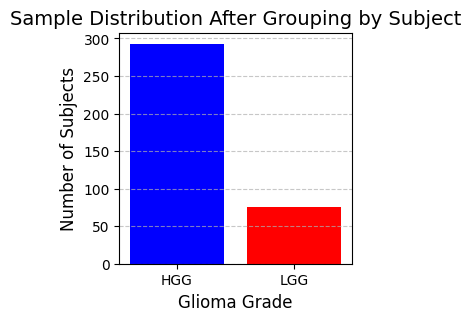

HGG: 293
LGG: 76


,subject_ID,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass,original_shape_Elongation,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Grade
0,BraTS20_Training_001,-0.343758,-0.340407,0.300411,-0.065715,1.894441,0.393734,1.370625,1.370625,1.085569,...,0.157991,-0.403995,-0.436791,0.073298,0.762200,-0.847280,-0.108356,-0.250733,-0.139729,1
1,BraTS20_Training_002,-0.258337,-0.299257,1.126541,0.291023,-0.548264,-0.403675,0.816742,0.816742,0.434601,...,-0.195548,-0.537490,-0.309807,-0.136039,-0.159153,-0.230127,-0.108187,-0.217976,-0.131464,1
2,BraTS20_Training_003,-0.326341,-0.325079,0.093878,-0.816742,-1.175086,-0.563156,-0.431841,-0.431841,-0.711522,...,0.571151,-1.399992,-0.436644,-0.120590,-0.039925,0.452868,-0.108994,-0.304627,-0.130225,1
3,BraTS20_Training_004,-0.320252,-0.336082,0.469392,-0.807355,0.066545,-0.722638,-0.206533,-0.206533,0.645777,...,0.068369,-0.622036,-0.440924,-0.066058,0.084834,-0.516493,-0.108543,-0.244058,-0.135019,1
4,BraTS20_Training_005,-0.335344,-0.311723,-1.135929,-1.257971,-1.307255,-0.563156,-0.460004,-0.460004,-2.440826,...,0.333555,-0.426430,0.003853,-0.151666,-0.256532,1.141523,-0.106963,-0.069697,-0.116473,1


In [133]:
# Select only numeric columns for aggregation
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
# Group by 'subject_ID' and aggregate numeric columns by their mean
grouped_data = merged_data.groupby('subject_ID')[numeric_columns].mean()

# Extract unique Grade values for each subject_ID and merge with grouped_data
grades = merged_data[['subject_ID', 'Grade']].drop_duplicates(subset='subject_ID').set_index('subject_ID')
grouped_data = pd.concat([grouped_data, grades['Grade']], axis=1)

# Map Grade to binary values
grouped_data['Grade'] = grouped_data['Grade'].map({'HGG': 1, 'LGG': 0})

# Count the number of samples in each class after grouping
sample_counts = grouped_data['Grade'].value_counts()

# Plot the class distribution after grouping
plt.figure(figsize=(3, 3))
plt.bar(['HGG', 'LGG'], 
        [sample_counts.get(1, 0), sample_counts.get(0, 0)], color=['blue', 'red'])
plt.title('Sample Distribution After Grouping by Subject', fontsize=14)
plt.ylabel('Number of Subjects', fontsize=12)
plt.xlabel('Glioma Grade', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the counts for LGG and HGG
print(f"HGG: {sample_counts.get(1, 0)}")
print(f"LGG: {sample_counts.get(0, 0)}")

# Reset the index to bring 'subject_ID' back as a column
grouped_data = grouped_data.reset_index()

# Display the first few rows of the updated grouped_data

grouped_data.head()


# Assign X, y, and split into training and tesing

In [134]:
# Drop 'Grade' and 'subject_ID' from the features
X = grouped_data.drop(columns=['Grade', 'subject_ID'])
grouped_data

y = grouped_data['Grade']

# Split the dataset into training and testing sets first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X

,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass,original_shape_Elongation,original_shape_Flatness,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,-0.343758,-0.340407,0.300411,-0.065715,1.894441,0.393734,1.370625,1.370625,1.085569,0.619492,...,-0.111379,0.157991,-0.403995,-0.436791,0.073298,0.762200,-0.847280,-0.108356,-0.250733,-0.139729
1,-0.258337,-0.299257,1.126541,0.291023,-0.548264,-0.403675,0.816742,0.816742,0.434601,0.084761,...,-0.109748,-0.195548,-0.537490,-0.309807,-0.136039,-0.159153,-0.230127,-0.108187,-0.217976,-0.131464
2,-0.326341,-0.325079,0.093878,-0.816742,-1.175086,-0.563156,-0.431841,-0.431841,-0.711522,-0.939852,...,-0.112334,0.571151,-1.399992,-0.436644,-0.120590,-0.039925,0.452868,-0.108994,-0.304627,-0.130225
3,-0.320252,-0.336082,0.469392,-0.807355,0.066545,-0.722638,-0.206533,-0.206533,0.645777,0.918079,...,-0.111704,0.068369,-0.622036,-0.440924,-0.066058,0.084834,-0.516493,-0.108543,-0.244058,-0.135019
4,-0.335344,-0.311723,-1.135929,-1.257971,-1.307255,-0.563156,-0.460004,-0.460004,-2.440826,-1.554703,...,-0.109977,0.333555,-0.426430,0.003853,-0.151666,-0.256532,1.141523,-0.106963,-0.069697,-0.116473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,0.901427,0.734551,-0.253472,0.319187,0.814077,-0.722638,0.985724,0.985724,0.237595,0.911998,...,0.022535,-0.495695,1.351480,1.414320,-0.151775,-0.385889,-0.581312,0.126128,0.538851,0.085313
365,-0.362974,-0.360696,-0.037551,-0.957560,-0.898365,-0.722638,-0.751027,-0.751027,-1.683948,-1.048487,...,-0.112955,0.412597,-0.485088,-0.529567,-0.074963,0.008862,0.454271,-0.109040,-0.141452,-0.129857
366,1.577115,1.241187,-0.685313,-0.215920,0.456546,0.393734,0.582046,0.582046,0.538951,0.319262,...,0.078662,-0.491066,1.256352,1.597482,-0.154317,-0.381408,-0.362593,0.014371,0.627139,0.166162
367,1.047831,0.976061,0.769803,-0.863682,-0.271004,-0.563156,-0.225308,-0.225308,1.176960,1.261664,...,0.157716,-0.491313,1.315086,1.196854,-0.154143,-0.392974,0.088827,0.171899,0.266220,0.386016


# Using OverSampling + Noise

After Augmentation (Training Set) - HGG: 230
After Augmentation (Training Set) - LGG: 230


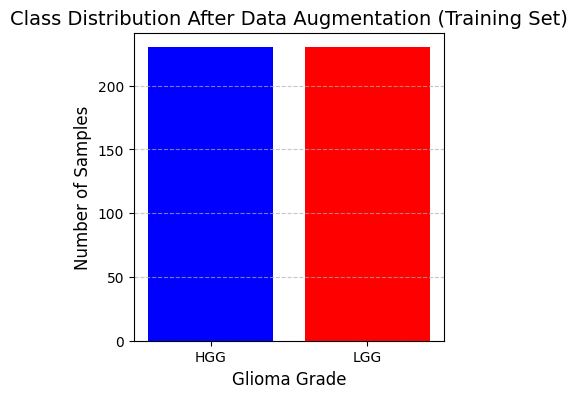

Test Set - HGG: 63
Test Set - LGG: 11


In [135]:


# Separate LGG (minority) and HGG (majority) in the training set
X_train_lgg = X_train[y_train == 0]

X_train_hgg = X_train[y_train == 1]

y_train_lgg = y_train[y_train == 0]

y_train_hgg = y_train[y_train == 1]

# Perform augmentation by upsampling 

# Function to add noise to numerical features
def add_noise(data, noise_level=0.03):
    # Create a copy of the DataFrame to avoid modifying the original
    data = data.copy()
    
    # Add noise only to numerical columns
    numerical_data = data.select_dtypes(include=[np.number])
    noisy_data = numerical_data + noise_level * np.random.randn(*numerical_data.shape)
    
    # Replace the original numerical data with noisy data
    data.loc[:, numerical_data.columns] = noisy_data
    return data

X_train_lgg_augmented, y_train_lgg_augmented = resample(X_train_lgg, y_train_lgg, n_samples=230)

X_train_hgg_augmented, y_train_hgg_augmented = resample(X_train_hgg, y_train_hgg)

# Split augmented data into 1/4
split_index_lgg = len(X_train_lgg_augmented) // 4

# Add noise to only 1/4 of the data
X_train_lgg_augmented[:split_index_lgg] = add_noise(
    X_train_lgg_augmented[:split_index_lgg]
)

# Combine augmented LGG and original HGG for the training set
X_train_combined = pd.concat([X_train_hgg_augmented, X_train_lgg_augmented])
y_train_combined = pd.concat([y_train_hgg_augmented, y_train_lgg_augmented])


# Shuffle the combined training set to mix the classes
X_train_combined, y_train_combined = shuffle(X_train_combined, y_train_combined, random_state=42)

# Count the new class distribution in the augmented training set
train_augmented_counts = y_train_combined.value_counts()

# Print the new class distribution
print(f"After Augmentation (Training Set) - HGG: {train_augmented_counts[1]}")
print(f"After Augmentation (Training Set) - LGG: {train_augmented_counts[0]}")

# Plot the new class distribution for the training set
plt.figure(figsize=(4, 4))
plt.bar(['HGG', 'LGG'], 
        [train_augmented_counts[1], train_augmented_counts[0]], color=['blue', 'red'])
plt.title('Class Distribution After Data Augmentation (Training Set)', fontsize=14)
plt.ylabel('Number of Samples', fontsize=12)
plt.xlabel('Glioma Grade', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the original test set class distribution
test_counts = y_test.value_counts()
print(f"Test Set - HGG: {test_counts[1]}")
print(f"Test Set - LGG: {test_counts[0]}")


## Train & Evalute ML models 

### Support Vector Classifier

#### Tuning

In [136]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf'], 
    'gamma': [1, 0.1, 0.01, 0.001]
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Initialize GridSearchCV with both accuracy and F1 scoring
grid_search = GridSearchCV(
    svm_model,
    param_grid,
    cv=2,
    scoring={
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, average='weighted')  # Weighted F1 score
    },
    refit='f1'  # Refits the model based on the best F1 score
)

# Fit the grid search to the training data
grid_search.fit(X_train_combined, y_train_combined)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy Score:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
print("Best Cross-Validation F1 Score:", grid_search.best_score_)


Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy Score: 0.932608695652174
Best Cross-Validation F1 Score: 0.9325704009549405


#### Training & Testing


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.82      0.58        11
           1       0.96      0.83      0.89        63

    accuracy                           0.82        74
   macro avg       0.71      0.82      0.73        74
weighted avg       0.89      0.82      0.84        74



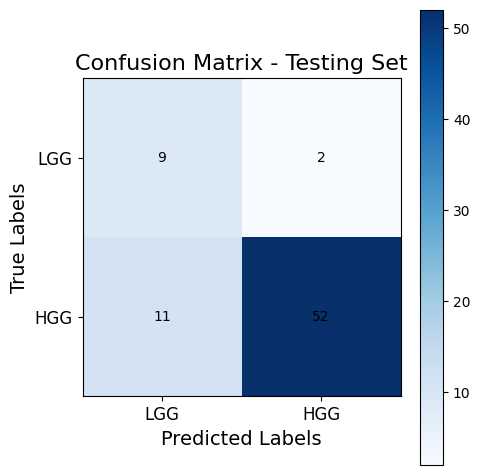


Training Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       230
           1       0.97      0.86      0.91       230

    accuracy                           0.91       460
   macro avg       0.92      0.91      0.91       460
weighted avg       0.92      0.91      0.91       460



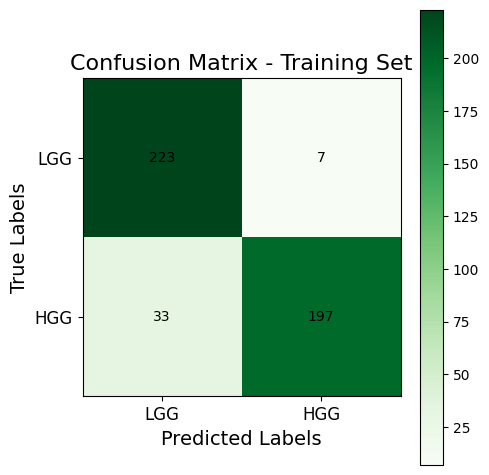

In [137]:
# Train the SVM classifier on the combined training data
clf = svm.SVC(C=1, gamma=0.01, kernel='rbf')
clf.fit(X_train_combined, y_train_combined)

# Make Predictions on the Testing Set
y_test_pred = clf.predict(X_test)

# Testing Classification Report and Confusion Matrix
print("\nTesting Classification Report:\n", classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot Testing Set Confusion Matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm_test, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Testing Set', fontsize=16)
plt.colorbar()

# Adding labels to the confusion matrix
classes = ['LGG', 'HGG']  # Updated class names
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)

# Add values to the matrix cells
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        plt.text(j, i, format(cm_test[i, j], 'd'), ha="center", va="center", color="black")

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

# Make Predictions on the Training Set
y_train_pred = clf.predict(X_train_combined)

# Training Classification Report and Confusion Matrix
print("\nTraining Classification Report:\n", classification_report(y_train_combined, y_train_pred))
cm_train = confusion_matrix(y_train_combined, y_train_pred)

# Plot Training Set Confusion Matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm_train, interpolation='nearest', cmap='Greens')
plt.title('Confusion Matrix - Training Set', fontsize=16)
plt.colorbar()

# Adding labels to the confusion matrix
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)

# Add values to the matrix cells
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        plt.text(j, i, format(cm_train[i, j], 'd'), ha="center", va="center", color="black")

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

### Decision Tree

#### Tuning

In [138]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 50],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples for a split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples for a leaf
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_features': [None, 'sqrt', 'log2']  # Features considered at each split
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=50)

# Initialize GridSearchCV with both accuracy and F1 scoring
grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring={
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, average='weighted')  # Weighted F1 score
    },
    refit='f1'  # Refits the model based on the best F1 score
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_combined, y_train_combined)

# Retrieve the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy Score:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy Score: 0.958695652173913
Best Cross-Validation F1 Score: 0.9586495697201853


/home/madan005/miniconda3/envs/my_env/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


#### Training & Testing


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.73      0.52        11
           1       0.94      0.81      0.87        63

    accuracy                           0.80        74
   macro avg       0.67      0.77      0.69        74
weighted avg       0.86      0.80      0.82        74



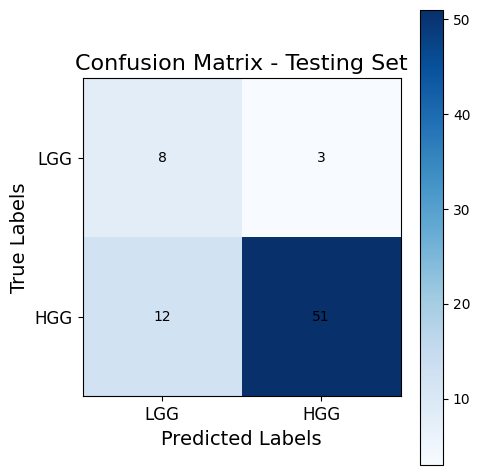


Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       230

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460



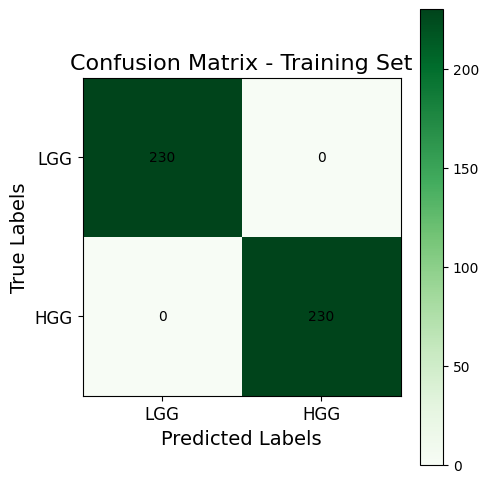

In [139]:
clf = DecisionTreeClassifier(
    random_state=50,
    criterion='entropy',
    max_features='sqrt',
    max_depth=10, 
    min_samples_leaf=1,
    min_samples_split=2
)

clf.fit(X_train_combined, y_train_combined)

# Make Predictions 
# Make Predictions on the Testing Set
y_test_pred = clf.predict(X_test)

# Testing Classification Report and Confusion Matrix
print("\nTesting Classification Report:\n", classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot Testing Set Confusion Matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm_test, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Testing Set', fontsize=16)
plt.colorbar()

# Adding labels to the confusion matrix
classes = ['LGG', 'HGG']  # Updated class names
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)

# Add values to the matrix cells
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        plt.text(j, i, format(cm_test[i, j], 'd'), ha="center", va="center", color="black")

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

# Make Predictions on the Training Set
y_train_pred = clf.predict(X_train_combined)

# Training Classification Report and Confusion Matrix
print("\nTraining Classification Report:\n", classification_report(y_train_combined, y_train_pred))
cm_train = confusion_matrix(y_train_combined, y_train_pred)

# Plot Training Set Confusion Matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm_train, interpolation='nearest', cmap='Greens')
plt.title('Confusion Matrix - Training Set', fontsize=16)
plt.colorbar()

# Adding labels to the confusion matrix
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)

# Add values to the matrix cells
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        plt.text(j, i, format(cm_train[i, j], 'd'), ha="center", va="center", color="black")

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

### GradientBoosting Classifier

#### Tuning

In [140]:
# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum depth of individual estimators
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples to form a leaf
    'subsample': [0.7, 0.8, 1.0]  # Fraction of samples used for fitting each estimator
}

# Initialize the Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=50)

# Initialize GridSearchCV with both accuracy and F1 scoring
grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=10,
    scoring={
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, average='weighted')  # Weighted F1 score
    },
    refit='f1',
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_combined, y_train_combined)

# Retrieve the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy Score:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7; total time=   0.

#### Training & Testing


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.94      0.92      0.93        63

    accuracy                           0.88        74
   macro avg       0.76      0.78      0.77        74
weighted avg       0.88      0.88      0.88        74



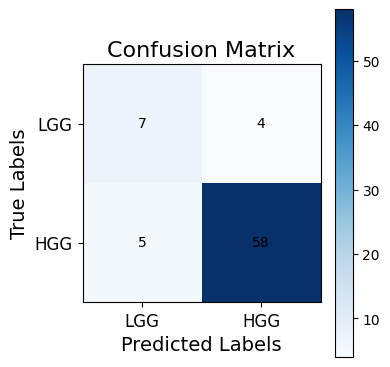


Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       230

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460



In [141]:
clf = GradientBoostingClassifier(
    learning_rate=0.2,
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=300,
    subsample=0.7
)

clf.fit(X_train_combined, y_train_combined)

y_pred = clf.predict(X_test)

print("\nTesting Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(4, 4))
plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.colorbar()
# Adding labels
classes = ['LGG', 'HGG']  # Updated class names
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)
# Add values to the matrix cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="black")

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()


y_pred = clf.predict(X_train_combined)

print("\nTraining Classification Report:\n", classification_report(y_train_combined, y_pred))


# Using SMOT

Original Training Set Distribution:
HGG: 230
LGG: 65

After SMOTE (Training Set) Class Distribution:
HGG: 230
LGG: 230


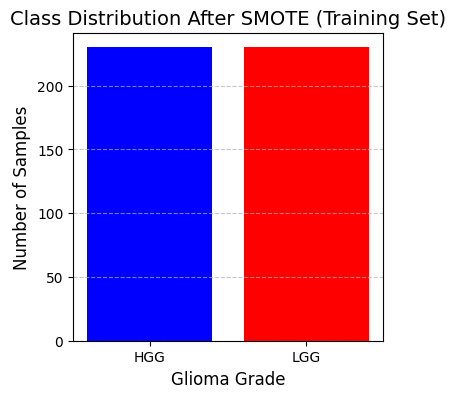

Test Set Distribution:
HGG: 63
LGG: 11


In [142]:
# Check the original class distribution in the training set
original_train_counts = y_train.value_counts()
print("Original Training Set Distribution:")
print(f"HGG: {original_train_counts[1]}")
print(f"LGG: {original_train_counts[0]}")

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smot, y_train_smot = smote.fit_resample(X_train, y_train)

# Shuffle the combined training set to mix the classes (optional but often good practice)
X_train_smot, y_train_smot = shuffle(X_train_smot, y_train_smot, random_state=42)

# Count the new class distribution after SMOTE
train_augmented_counts = y_train_smot.value_counts()
print("\nAfter SMOTE (Training Set) Class Distribution:")
print(f"HGG: {train_augmented_counts[1]}")
print(f"LGG: {train_augmented_counts[0]}")

# Plot the new class distribution for the training set
plt.figure(figsize=(4, 4))
plt.bar(['HGG', 'LGG'],
        [train_augmented_counts[1], train_augmented_counts[0]],
        color=['blue', 'red'])
plt.title('Class Distribution After SMOTE (Training Set)', fontsize=14)
plt.ylabel('Number of Samples', fontsize=12)
plt.xlabel('Glioma Grade', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the original test set class distribution for reference
test_counts = y_test.value_counts()
print("Test Set Distribution:")
print(f"HGG: {test_counts[1]}")
print(f"LGG: {test_counts[0]}")


## Train & Evalute ML models 

### Support Vector Classifier

#### Tuning

In [143]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf'], 
    'gamma': [1, 0.1, 0.01, 0.001]
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Initialize GridSearchCV with both accuracy and F1 scoring
grid_search = GridSearchCV(
    svm_model,
    param_grid,
    cv=2,
    scoring={
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, average='weighted')  # Weighted F1 score
    },
    refit='f1'  # Refits the model based on the best F1 score
)

# Fit the grid search to the training data
grid_search.fit(X_train_smot, y_train_smot)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy Score:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
print("Best Cross-Validation F1 Score:", grid_search.best_score_)


Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy Score: 0.9065217391304348
Best Cross-Validation F1 Score: 0.9063107860972888


#### Training & Testing


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.45      0.45        11
           1       0.90      0.90      0.90        63

    accuracy                           0.84        74
   macro avg       0.68      0.68      0.68        74
weighted avg       0.84      0.84      0.84        74



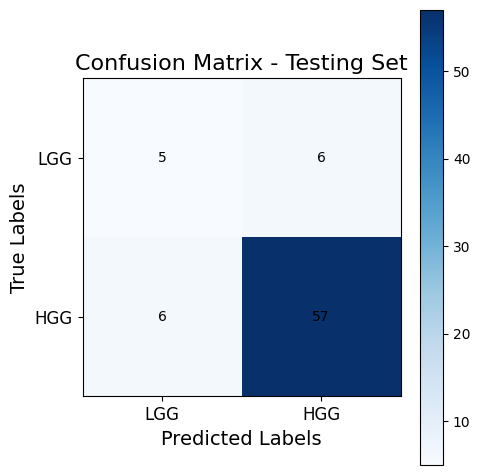


Training Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       230
           1       0.98      0.98      0.98       230

    accuracy                           0.98       460
   macro avg       0.98      0.98      0.98       460
weighted avg       0.98      0.98      0.98       460



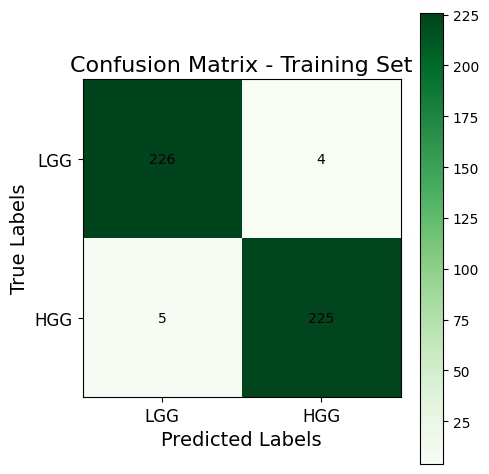

In [144]:
clf = svm.SVC(C=10, gamma=0.01, kernel='rbf', random_state=42)

# Train the model on the resampled data (SMOTE)
clf.fit(X_train_smot, y_train_smot)

# Make Predictions on the Testing Set
y_test_pred = clf.predict(X_test)

# Testing Classification Report and Confusion Matrix
print("\nTesting Classification Report:\n", classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot Testing Set Confusion Matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm_test, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Testing Set', fontsize=16)
plt.colorbar()

# Adding labels to the confusion matrix
classes = ['LGG', 'HGG']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)

# Add values to the matrix cells
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        plt.text(j, i, format(cm_test[i, j], 'd'), ha="center", va="center", color="black")

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

# Make Predictions on the Training Set
y_train_pred = clf.predict(X_train_smot)

# Training Classification Report and Confusion Matrix
print("\nTraining Classification Report:\n", classification_report(y_train_smot, y_train_pred))
cm_train = confusion_matrix(y_train_smot, y_train_pred)

# Plot Training Set Confusion Matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm_train, interpolation='nearest', cmap='Greens')
plt.title('Confusion Matrix - Training Set', fontsize=16)
plt.colorbar()

# Adding labels to the confusion matrix
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)

# Add values to the matrix cells
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        plt.text(j, i, format(cm_train[i, j], 'd'), ha="center", va="center", color="black")

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()



### Decision Tree

#### Training & Testing


Testing Classification Report:


               precision    recall  f1-score   support

           0       0.46      0.55      0.50        11
           1       0.92      0.89      0.90        63

    accuracy                           0.84        74
   macro avg       0.69      0.72      0.70        74
weighted avg       0.85      0.84      0.84        74



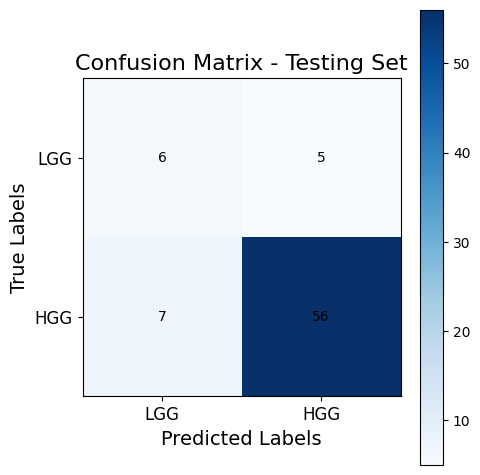


Training Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       230
           1       0.92      0.94      0.93       230

    accuracy                           0.93       460
   macro avg       0.93      0.93      0.93       460
weighted avg       0.93      0.93      0.93       460



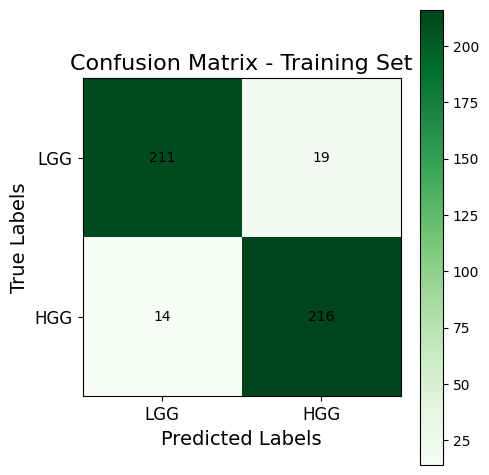

In [145]:
# Initialize the Decision Tree Classifier with specified parameters
clf = DecisionTreeClassifier(
    random_state=50,
    criterion='entropy',
    max_features=None,
    max_depth=50,  # Example value, tune as needed
    min_samples_leaf=10
)

# Train the model on the resampled data (SMOTE)
clf.fit(X_train_smot, y_train_smot)

# Make Predictions on the Testing Set
y_test_pred = clf.predict(X_test)

# Testing Classification Report and Confusion Matrix
print("\nTesting Classification Report:\n", classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot Testing Set Confusion Matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm_test, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Testing Set', fontsize=16)
plt.colorbar()

# Adding labels to the confusion matrix
classes = ['LGG', 'HGG']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)

# Add values to the matrix cells
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        plt.text(j, i, format(cm_test[i, j], 'd'), ha="center", va="center", color="black")

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

# Make Predictions on the Training Set
y_train_pred = clf.predict(X_train_smot)

# Training Classification Report and Confusion Matrix
print("\nTraining Classification Report:\n", classification_report(y_train_smot, y_train_pred))
cm_train = confusion_matrix(y_train_smot, y_train_pred)

# Plot Training Set Confusion Matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm_train, interpolation='nearest', cmap='Greens')
plt.title('Confusion Matrix - Training Set', fontsize=16)
plt.colorbar()

# Adding labels to the confusion matrix
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)

# Add values to the matrix cells
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        plt.text(j, i, format(cm_train[i, j], 'd'), ha="center", va="center", color="black")

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()


### GradientBoosting Classifier

#### Tuning

In [146]:
# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum depth of individual estimators
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples to form a leaf
    'subsample': [0.7, 0.8, 1.0]  # Fraction of samples used for fitting each estimator
}

# Initialize the Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=50)

# Initialize GridSearchCV with both accuracy and F1 scoring
grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=10,
    scoring={
        'accuracy': 'accuracy',
        'f1': make_scorer(f1_score, average='weighted')  # Weighted F1 score
    },
    refit='f1',
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_smot, y_train_smot)

# Retrieve the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy Score:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.7; total time=   0.

#### Training & Testing


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.64      0.58        11
           1       0.93      0.90      0.92        63

    accuracy                           0.86        74
   macro avg       0.74      0.77      0.75        74
weighted avg       0.88      0.86      0.87        74



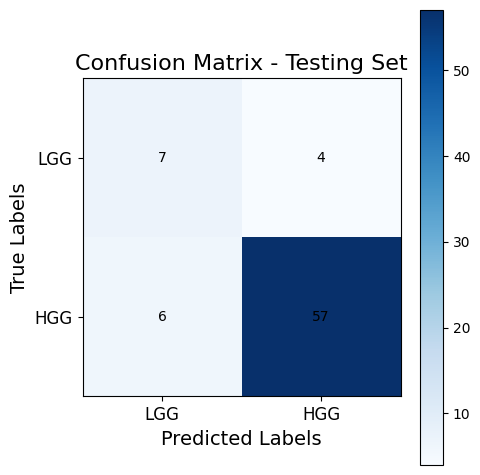


Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       230

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460



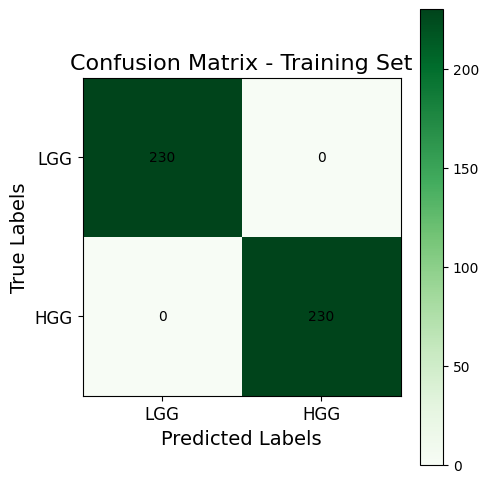

In [147]:
clf = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_samples_leaf=10,
    min_samples_split=20,
    n_estimators=100,
    subsample=0.8,
    max_features='sqrt',
    random_state=50
)

# Train the model on the resampled data (SMOTE)
clf.fit(X_train_smot, y_train_smot)

# Make Predictions on the Testing Set
y_test_pred = clf.predict(X_test)

# Testing Classification Report and Confusion Matrix
print("\nTesting Classification Report:\n", classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot Testing Set Confusion Matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm_test, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Testing Set', fontsize=16)
plt.colorbar()

# Adding labels to the confusion matrix
classes = ['LGG', 'HGG']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)

# Add values to the matrix cells
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        plt.text(j, i, format(cm_test[i, j], 'd'), ha="center", va="center", color="black")

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()

# Make Predictions on the Training Set
y_train_pred = clf.predict(X_train_smot)

# Training Classification Report and Confusion Matrix
print("\nTraining Classification Report:\n", classification_report(y_train_smot, y_train_pred))
cm_train = confusion_matrix(y_train_smot, y_train_pred)

# Plot Training Set Confusion Matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm_train, interpolation='nearest', cmap='Greens')
plt.title('Confusion Matrix - Training Set', fontsize=16)
plt.colorbar()

# Adding labels to the confusion matrix
plt.xticks(tick_marks, classes, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)

# Add values to the matrix cells
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        plt.text(j, i, format(cm_train[i, j], 'd'), ha="center", va="center", color="black")

plt.ylabel('True Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)
plt.tight_layout()
plt.show()
